In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install openpyxl

In [3]:
df=pd.read_excel(r"C:\Users\Samanyu K\Downloads\BlinkIT Grocery Data.xlsx")
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [4]:
df.isnull().any()

Item Fat Content             False
Item Identifier              False
Item Type                    False
Outlet Establishment Year    False
Outlet Identifier            False
Outlet Location Type         False
Outlet Size                  False
Outlet Type                  False
Item Visibility              False
Item Weight                   True
Sales                        False
Rating                       False
dtype: bool

In [5]:
df.isnull().sum()/df.shape[0]*100

Item Fat Content              0.000000
Item Identifier               0.000000
Item Type                     0.000000
Outlet Establishment Year     0.000000
Outlet Identifier             0.000000
Outlet Location Type          0.000000
Outlet Size                   0.000000
Outlet Type                   0.000000
Item Visibility               0.000000
Item Weight                  17.165317
Sales                         0.000000
Rating                        0.000000
dtype: float64

In [6]:
tdf=df[df['Item Weight'].isnull()]
tdf

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0
10,LF,FDX21,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.084555,NaN,109.8912,5.0
14,Low Fat,FDH19,Meat,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.032928,NaN,173.1738,5.0
18,Low Fat,FDJ56,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.182515,NaN,98.7700,5.0
20,Regular,FDZ07,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,60.2194,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [7]:
df['Item Weight'] = df.groupby('Item Fat Content')['Item Weight'].transform(lambda x: x.fillna(x.median()))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [10]:
df['Item Fat Content']=df['Item Fat Content'].str.replace('LF','Low Fat')
df['Item Fat Content']=df['Item Fat Content'].str.replace('low fat','Low Fat')
df['Item Fat Content']=df['Item Fat Content'].str.replace('reg','Regular')

In [11]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [12]:
df['Item Type'].value_counts()

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [13]:
df['Outlet Establishment Year'].value_counts()

Outlet Establishment Year
2018    1463
2014     932
2012     930
2016     930
2017     930
2015     929
2022     928
2020     926
2011     555
Name: count, dtype: int64

In [14]:
df['Outlet Location Type'].value_counts()

Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

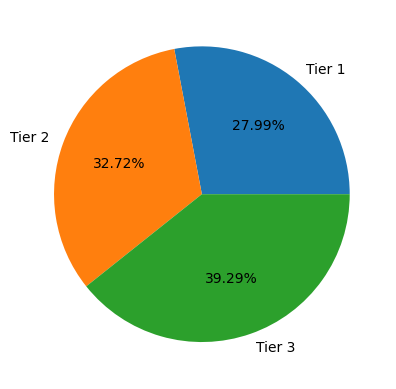

In [15]:
tdf=df.groupby('Outlet Location Type').aggregate({'Sales':'sum'})
plt.pie(tdf['Sales'],labels=tdf.index,autopct='%.2f%%')
plt.show()

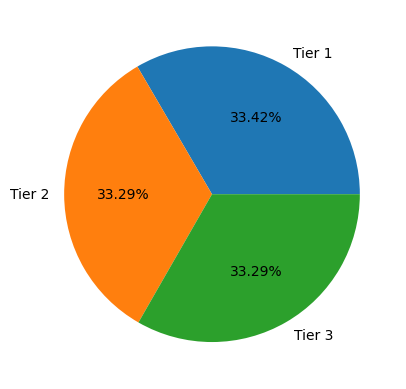

In [16]:
tdf=df.groupby('Outlet Location Type').aggregate({'Rating':'mean'})
plt.pie(tdf['Rating'],labels=tdf.index,autopct='%.2f%%')
plt.show()

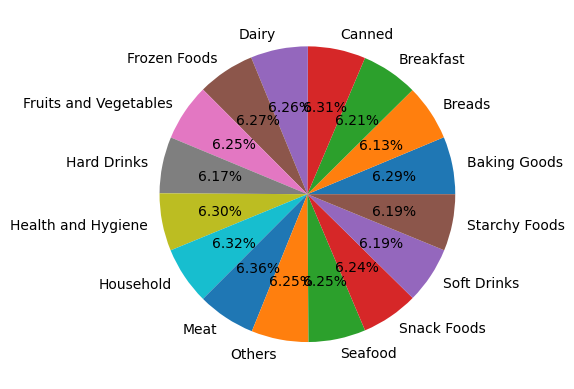

In [17]:
tdf=df.groupby('Item Type').aggregate({'Rating':'mean'})
plt.pie(tdf['Rating'],labels=tdf.index,autopct='%.2f%%')
plt.show()

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.to_excel('blink.xlsx', index=False)